In [37]:
using NPZ
using Interpolations
using Cubature
using PyCall
using LinearAlgebra
using BenchmarkTools
using PyPlot
using QuadGK
include("xray_3dphc.jl")
numpy = pyimport("numpy")

PyObject <module 'numpy' from '/home/elinas/miniconda3/envs/mp/lib/python3.7/site-packages/numpy/__init__.py'>

In [41]:
D_sc_fs, ωdat_sc_fs, Nk_sc_fs = read_phc_data("phc_an_files/phc3d_sc_fs_e_12_15_12b.npz", "SC", 0.8e-7);
D_sc_sph, ωdat_sc_sph, Nk_sc_sph = read_phc_data("phc_an_files/phc3d_sc_sph_e_12_15_12b.npz", "SC", 0.5e-6);

In [14]:
ωp = 1e19
#dmnd and ln
# g = 3.1e10
# ga
g = 1.95e10
gvec = g * [0,0,1]
θB = asin(g*c/(2*ωp))
# println(θB)

# χ = 2e-17 # dmmd
# χ = 1.3e-13 # LN
χ = 4.7e-14 # GA
np = 1e14
L = 1e-4 # 0.1mm where period is micron scale sounds reasonable
P = PumpBeam(1e19, θB, 0.0)

PumpBeam(1.0e19, 0.29662806479241327, 0.0)

## Compare free space MPB to analytical solution

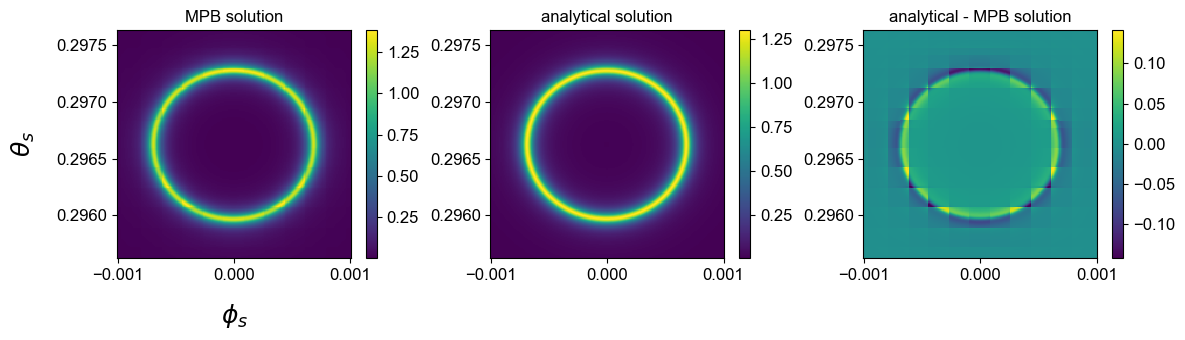

In [29]:
θdev = 0.001
ϕdev = 0.001
Ei = 1.3
ωi = Ei/ħeV #2/ħeV
Nangles = 200
dat = zeros(Nangles,Nangles)
θrange = range(θB - θdev, θB + θdev, length=Nangles)
ϕrange = range(-ϕdev, ϕdev, length=Nangles)

#    1              2       3  4    5    6     7       8      9
# noffset, k0_vec_no_unit, M0, ωi, lor, Ep2, prefac, kbvec, Msplines
Threads.@threads for b in 1:12
    newdat = [dΓdωdΩ_SC_fs_nn(ωp - ωi, θs, ϕs, g*[1, 0, 0], P, D_sc_fs, χ, np, L, b, lz=1.2e14, Nk=Nk_sc_fs)*2*cos(θs)
                        for θs in θrange, ϕs in ϕrange]
    global dat .+= newdat
end

subplots(1,3, figsize=(12, 3.5))
subplot(1,3,1)
pcolormesh(ϕrange, θrange, dat)
title("MPB solution")
xlabel(L"$ϕ_s$", fontsize=18.0, labelpad=14.0)
ylabel(L"$θ_s$", fontsize=18.0, labelpad=14)
colorbar()

dat2, a, b = ang_spec_free(Ei, P, 12, gvec, χ, np, L; Nangles=Nangles, θdev=θdev, ϕdev=ϕdev, lz=1.2e14)
subplot(1,3,2)
pcolormesh(ϕrange, θrange, dat2)
title("analytical solution")
colorbar()

subplot(1,3,3)
pcolormesh(ϕrange, θrange, dat2 .- dat)
title("analytical - MPB solution")
colorbar()

tight_layout()

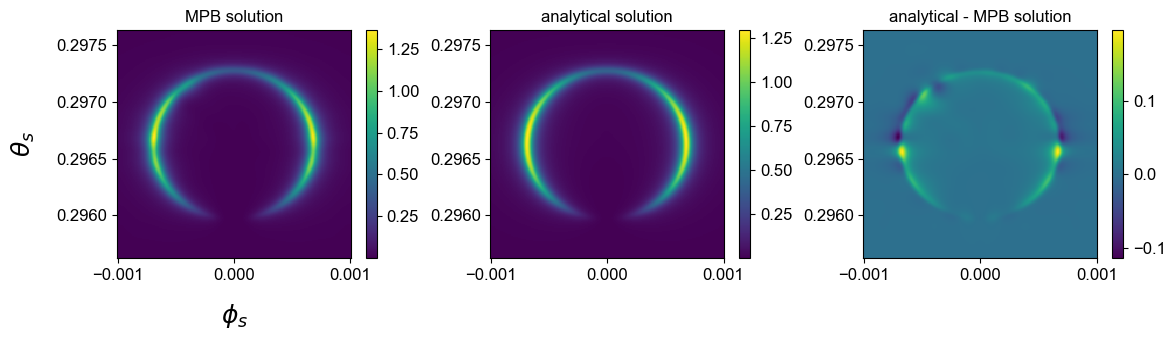

In [40]:
dat = zeros(Nangles,Nangles)
Threads.@threads for b in 1:12
    newdat = [dΓdωdΩ_SC(ωp - ωi, θs, ϕs, g*[1, 0, 0], P, D_sc_fs, χ, np, L, b, lz=1.2e14)*1.25*cos(θs)
                        for θs in θrange, ϕs in ϕrange]
    global dat .+= newdat
end

subplots(1,3, figsize=(12, 3.5))
subplot(1,3,1)
pcolormesh(ϕrange, θrange, dat)
title("MPB solution")
xlabel(L"$ϕ_s$", fontsize=18.0, labelpad=14.0)
ylabel(L"$θ_s$", fontsize=18.0, labelpad=14)
colorbar()

dat2, a, b = ang_spec_free(Ei, P, 12, gvec, χ, np, L; Nangles=Nangles, θdev=θdev, ϕdev=ϕdev, lz=1.2e14, pol="tm")
subplot(1,3,2)
pcolormesh(ϕrange, θrange, dat2)
title("analytical solution")
colorbar()

subplot(1,3,3)
pcolormesh(ϕrange, θrange, dat2 .- dat)
title("analytical - MPB solution")
colorbar()

tight_layout()

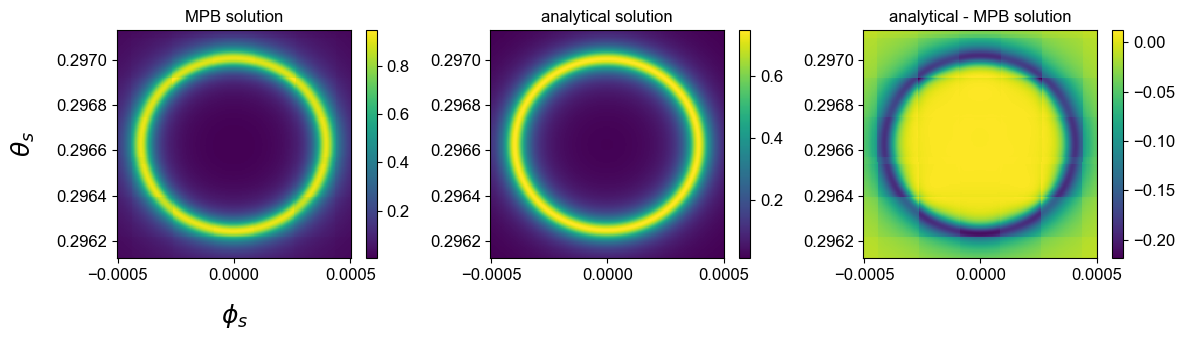

In [47]:
θdev = 0.0005
ϕdev = 0.0005
Ei = 0.75
ωi = Ei/ħeV #2/ħeV
Nangles = 200
dat = zeros(Nangles,Nangles)
θrange = range(θB - θdev, θB + θdev, length=Nangles)
ϕrange = range(-ϕdev, ϕdev, length=Nangles)

Threads.@threads for b in 1:12
    newdat = [dΓdωdΩ_SC_fs_nn(ωp - ωi, θs, ϕs, g*[1, 0, 0], P, D_sc_fs, χ, np, L, b, lz=1.2e14)*2*cos(θs)
                        for θs in θrange, ϕs in ϕrange]
    global dat .+= newdat
end

subplots(1,3, figsize=(12, 3.5))
subplot(1,3,1)
pcolormesh(ϕrange, θrange, dat)
title("MPB solution")
xlabel(L"$ϕ_s$", fontsize=18.0, labelpad=14.0)
ylabel(L"$θ_s$", fontsize=18.0, labelpad=14)
colorbar()

dat2, a, b = ang_spec_free(Ei, P, 12, gvec, χ, np, L; Nangles=Nangles, θdev=θdev, ϕdev=ϕdev, lz=1.2e14)
subplot(1,3,2)
pcolormesh(ϕrange, θrange, dat2)
title("analytical solution")
colorbar()

subplot(1,3,3)
pcolormesh(ϕrange, θrange, dat2 .- dat)
title("analytical - MPB solution")
colorbar()

tight_layout()

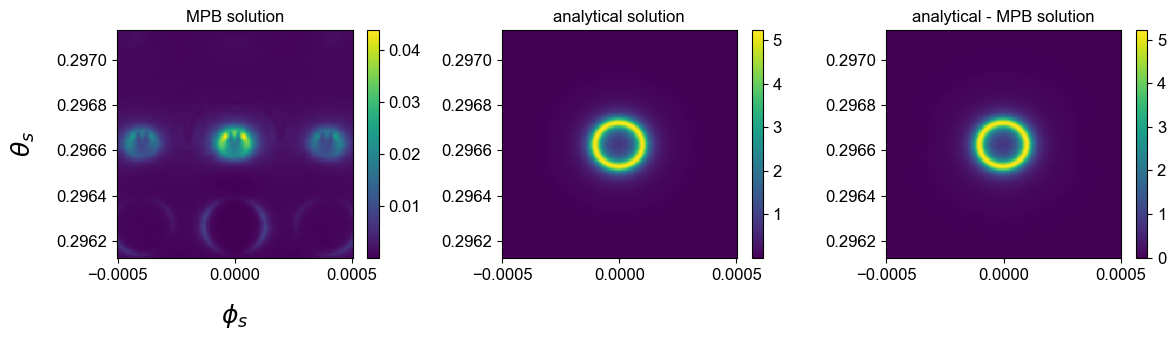

In [48]:
ϵ_sc_sph = 1.72

dat = zeros(Nangles,Nangles)
Threads.@threads for b in 1:12
    newdat = [dΓdωdΩ_SC(ωp - ωi, θs, ϕs, g*[1, 0, 0], P, D_sc_sph, χ, np, L, b, lz=1.2e14)*cos(θs)
                        for θs in θrange, ϕs in ϕrange]
    global dat .+= newdat
end

subplots(1,3, figsize=(12, 3.5))
subplot(1,3,1)
pcolormesh(ϕrange, θrange, dat)
title("MPB solution")
xlabel(L"$ϕ_s$", fontsize=18.0, labelpad=14.0)
ylabel(L"$θ_s$", fontsize=18.0, labelpad=14)
colorbar()

dat2, a, b = ang_spec_free(Ei, P, ϵ_sc_sph, gvec, χ, np, L; Nangles=Nangles, θdev=θdev, ϕdev=ϕdev, lz=1.2e14)
subplot(1,3,2)
pcolormesh(ϕrange, θrange, dat2)
title("analytical solution")
colorbar()

subplot(1,3,3)
pcolormesh(ϕrange, θrange, dat2 .- dat)
title("analytical - MPB solution")
colorbar()

tight_layout()

## Why is the rate so low

In [ ]:
θdev = 0.001
ϕdev = 0.001
Ei = 1.3
ωi = Ei/ħeV #2/ħeV
Nangles = 200
dat = zeros(Nangles,Nangles)
θrange = range(θB - θdev, θB + θdev, length=Nangles)
ϕrange = range(-ϕdev, ϕdev, length=Nangles)


In [59]:
eff_spec_fs = dηdω_free(100, 2.0, ϵ_sc_sph, P, gvec, χ, np, L; Nangles=200, θdev=0.00125, ϕdev=0.0025, lz=1.2e14, pol="te")[1]
    .+ dηdω_free(100, 2.0, ϵ_sc_sph, P, gvec, χ, np, L; Nangles=200, θdev=0.00125, ϕdev=0.0025, lz=1.2e14, pol="tm")[1]

omega i = 1
omega i = 2
omega i = 3
omega i = 4
omega i = 5
omega i = 6
omega i = 7
omega i = 8
omega i = 9
omega i = 10
omega i = 11
omega i = 12
omega i = 13
omega i = 14
omega i = 15
omega i = 16
omega i = 17
omega i = 18
omega i = 19
omega i = 20
omega i = 21
omega i = 22
omega i = 23
omega i = 24
omega i = 25
omega i = 26
omega i = 27
omega i = 28
omega i = 29
omega i = 30
omega i = 31
omega i = 32
omega i = 33
omega i = 34
omega i = 35
omega i = 36
omega i = 37
omega i = 38
omega i = 39
omega i = 40
omega i = 41
omega i = 42
omega i = 43
omega i = 44
omega i = 45
omega i = 46
omega i = 47
omega i = 48
omega i = 49
omega i = 50
omega i = 51
omega i = 52
omega i = 53
omega i = 54
omega i = 55
omega i = 56
omega i = 57
omega i = 58
omega i = 59
omega i = 60
omega i = 61
omega i = 62
omega i = 63
omega i = 64
omega i = 65
omega i = 66
omega i = 67
omega i = 68
omega i = 69
omega i = 70
omega i = 71
omega i = 72
omega i = 73
omega i = 74
omega i = 75
omega i = 76
omega i = 77
omega i 

100-element Array{Float64,1}:
 1.025482885903049e-24
 3.387536078153073e-24
 6.214332172002152e-24
 9.569605695983415e-24
 1.3514699029991742e-23
 1.810704226427885e-23
 2.3393242523014232e-23
 2.9407546867517616e-23
 3.617490509290297e-23
 4.3715511718364565e-23
 5.204911293644537e-23
 6.119775544744854e-23
 7.118528617106596e-23
 ⋮
 3.471208116849312e-21
 3.551001684388654e-21
 3.6317934660755476e-21
 3.713494770339738e-21
 3.796016985444556e-21
 3.879340783479089e-21
 3.963531078403266e-21
 4.048688851303199e-21
 4.134874637289179e-21
 4.222058109244618e-21
 4.310135571598076e-21
 4.399010220003812e-21

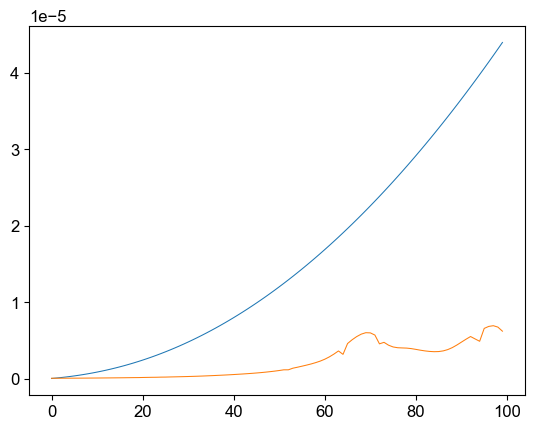

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1d4ea0a950>

In [65]:
plot(eff_spec_fs*np*c*1e-3^2)
plot(eff_spec_sph*np*c*1e-3^2)

In [64]:
eff_spec_sph = dηdω(100, 2.0, P, D_sc_sph, "sc", g*[1, 0, 0], χ, np, L; Nangles=100, θdev=0.002, ϕdev=0.002, lz=1.2e14)

phidev = 0.0018299169928324426
θp = 0.29662806479241327
omega i = 1
omega i = 2
omega i = 3
omega i = 4
omega i = 5
omega i = 6
omega i = 7
omega i = 8
omega i = 9
omega i = 10
omega i = 11
omega i = 12
omega i = 13
omega i = 14
omega i = 15
omega i = 16
omega i = 17
omega i = 18
omega i = 19
omega i = 20
omega i = 21
omega i = 22
omega i = 23
omega i = 24
omega i = 25
omega i = 26
omega i = 27
omega i = 28
omega i = 29
omega i = 30
omega i = 31
omega i = 32
omega i = 33
omega i = 34
omega i = 35
omega i = 36
omega i = 37
omega i = 38
omega i = 39
omega i = 40
omega i = 41
omega i = 42
omega i = 43
omega i = 44
omega i = 45
omega i = 46
omega i = 47
omega i = 48
omega i = 49
omega i = 50
omega i = 51
omega i = 52
omega i = 53
omega i = 54
omega i = 55
omega i = 56
omega i = 57
omega i = 58
omega i = 59
omega i = 60
omega i = 61
omega i = 62
omega i = 63
omega i = 64
omega i = 65
omega i = 66
omega i = 67
omega i = 68
omega i = 69
omega i = 70
omega i = 71
omega i = 72
omega i = 73
omeg

100-element Array{Float64,1}:
 1.7868303618323196e-24
 1.8485585588943263e-24
 1.9146175005409015e-24
 1.986824433115217e-24
 2.0685243475975386e-24
 2.16215475418481e-24
 2.266545518091629e-24
 2.3878783976610962e-24
 2.5247422022484767e-24
 2.67586728916186e-24
 2.836933380614486e-24
 3.0052846634707803e-24
 3.180223786357758e-24
 ⋮
 1.3544815492471066e-22
 1.4668791145884412e-22
 1.5933767345139579e-22
 1.7189912144931231e-22
 1.8372594931984949e-22
 1.7319186179656506e-22
 1.6299138401196304e-22
 2.1914340996336043e-22
 2.278129219848493e-22
 2.308913929378035e-22
 2.2482701742172114e-22
 2.0702996391579017e-22